In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

DATA = os.path.join('..','..','data','Event_Metadata','Mount_Baker_Region_Full_Catalog_Event_Summary.csv')


In [11]:
# Load CSV output from PostgreSQL query on `archdb`
df = pd.read_csv(DATA)
# Fix Header Name
df = df.rename(columns={'to_timestamp': 'timestamp'})
# Convert timestamps from string to pandas Timestamp and shift from local time to UTC
df.timestamp = df.timestamp.apply(lambda x: pd.Timestamp(x).tz_convert(None))
# One-Hot encode etype
ohe = dict(zip(df['etype'].unique(), range(len(df['etype'].unique()))))
df = df.assign(etype_code=[ohe[x] for x in df.etype])
# Show the result
display(df)

,evid,prefor,prefmag,etype,timestamp,lat,lon,depth,magnitude,magtype,nsta,nobs,uncertainty,etype_code
0,10835733,1156248,899953,uk,1969-10-02 11:17:43.000000,48.799833,-121.699833,18.00000,2.50,d,0,0,NaN,0
1,10857743,1183783,926373,eq,1973-11-11 19:01:59.980000,48.656333,-121.682000,-1.21400,1.80,d,4,4,0.120000,1
2,10845458,1166308,909738,eq,1977-12-28 21:13:06.710000,48.692833,-121.833667,-0.31200,1.10,d,3,3,0.060000,1
3,10849148,1169998,913398,eq,1979-03-11 05:35:26.400000,48.768500,-121.799500,-0.82800,1.50,d,5,5,0.110000,1
4,10849673,1170523,913918,eq,1979-05-03 22:56:04.540000,48.783833,-121.784000,-0.06600,2.20,d,10,10,0.090000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,62044371,3288123,3305403,lf,2024-09-08 07:55:50.019998,48.744167,-121.829667,-0.70000,1.44,l,6,16,0.055422,3
653,62044871,3288473,3305908,su,2024-09-10 07:36:21.122518,48.800800,-121.920100,-1.59058,-5.00,h,0,0,NaN,4
654,62045106,3288798,3306393,eq,2024-09-11 11:45:27.790000,48.682833,-121.652000,2.75000,1.34,l,6,14,0.063106,1
655,62045406,3288868,3306518,su,2024-09-12 06:34:25.808021,48.800800,-121.920100,-1.59058,-5.00,h,0,0,NaN,4


etype  etype_code
eq     1             308
lf     3             298
px     2              15
su     4              35
uk     0               1
Name: count, dtype: int64

/Users/nates/miniconda3/envs/eqcorrscan/lib/python3.11/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/nates/miniconda3/envs/eqcorrscan/lib/python3.11/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


(40.0, -5.0)

<Figure size 640x480 with 0 Axes>

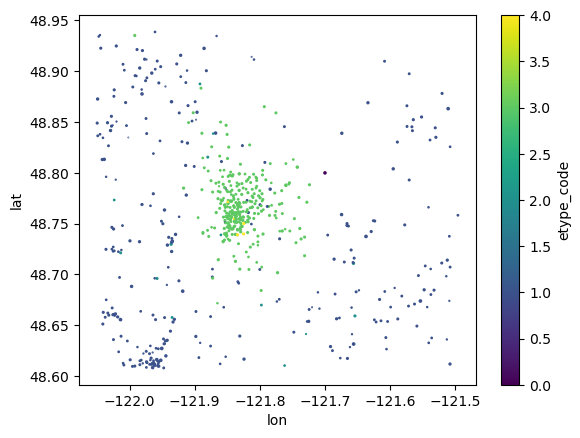

<Figure size 640x480 with 0 Axes>

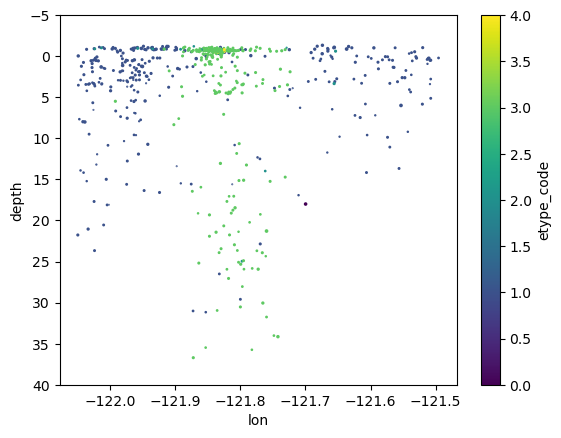

In [22]:
display(df[['etype','etype_code']].value_counts().sort_index())
fig = plt.figure()
df.plot.scatter('lon','lat',s='magnitude', c='etype_code', colormap='viridis')
plt.figure()
df.plot.scatter('lon','depth',s='magnitude', c='etype_code', colormap='viridis')
plt.ylim([40,-5])

21

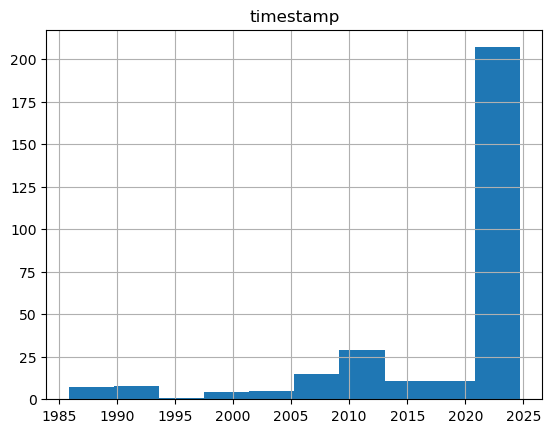

In [30]:
df[df.etype=='lf'].hist('timestamp')
# plt.ylim([40, -5])
display(len(df[(df.etype=='lf') & (df.timestamp > pd.Timestamp('2009-01-01')) & (df.depth > 10)]))